# **This notebook contains the implementation of a class for handling graphs.**

## **Graph implementation**

In [50]:
from collections import defaultdict


class Graph(object):
  # basic implementation of a graph

  def __init__(self, edges, directed=False):
    # initializes the base structures of the graph
    self.adj = defaultdict(set)
    self.directed = directed
    self.add_edges(edges)


  def get_vertices(self):
    # returns the list of graph vertices
    return list(self.adj.keys())


  def get_edges(self):
    # returns the list of edges of the graph
    return [(k, v) for k in self.adj.keys() for v in self.adj[k]]


  def get_adj_list(self):
    # returns the adjacency list
    return self.adj


  def add_edges(self, edges):
    # add edges to the graph
    for u, v in edges:
        self.add_arc(u, v)


  def add_arc(self, u, v):
    # adds a link (arc) between nodes 'u' and 'v'
    self.adj[u].add(v)
    # if the graph is undirected, we need to add arcs in both directions
    if not self.directed:
        self.adj[v].add(u)


  def there_is_edge(self, u, v):
    # is there an edge between vertices 'u' and 'v'?
    return u in self.adj and v in self.adj[u]


  def __len__(self):
    # returns the size of the graph
    return len(self.adj)


  def __str__(self):
    # returns the structure of the graph in string
    return '{}({})'.format(self.__class__.__name__, dict(self.adj))


  def __getitem__(self, v):
    # returns the nodes linked to the graph
    return self.adj[v]


### **Testing graph implementation**

In [71]:
# create the list of edges
edges = [('A', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'F'), ('C', 'B'), ('C', 'E'), ('D', 'A'), ('E', 'B')]

# create and print the graph
grafo = Graph(edges, directed=True)
print(grafo.adj)
print(grafo)
print(f'Number of nodes: {len(grafo)}')
print(f'Nodes linked to node "B": {grafo["B"]}')

defaultdict(<class 'set'>, {'A': {'B'}, 'B': {'C', 'D', 'F'}, 'C': {'B', 'E'}, 'D': {'A'}, 'E': {'B'}})
Graph({'A': {'B'}, 'B': {'C', 'D', 'F'}, 'C': {'B', 'E'}, 'D': {'A'}, 'E': {'B'}})
Number of nodes: 5
Nodes linked to node "B": {'C', 'D', 'F'}


In [72]:
print(grafo.get_vertices())

['A', 'B', 'C', 'D', 'E']


In [73]:
print(grafo.get_edges())

[('A', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'F'), ('C', 'B'), ('C', 'E'), ('D', 'A'), ('E', 'B')]


In [74]:
print(grafo.there_is_edge('A', 'B'), grafo.there_is_edge('E', 'C'))

True False


In [75]:
grafo.get_adj_list()

defaultdict(set,
            {'A': {'B'},
             'B': {'C', 'D', 'F'},
             'C': {'B', 'E'},
             'D': {'A'},
             'E': {'B'}})

## **Viewing the graph**

**Let's use the NetworkX library to manipulate the created graph. We will also use the Matplotlib library to visualize the developed graph.**

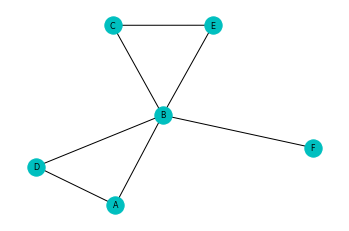

In [76]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(grafo.get_adj_list())
nx.draw_networkx(G, with_labels = True, node_color = "c", edge_color = "k", font_size = 8)

plt.axis('off')
plt.draw()
plt.savefig("graph.pdf")